# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 


For our data mining/analysis customer, we need to help first identify out of all the data columns, which columns would directly impact the final sal

My initial hypothesis is that the price of the car is highly correlated by year and the odometer. I believe that these two features would be the basis of major differences in price. There maybe other features that can influence the final price and we will find out during our data mining analysis.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1176]:
#importing the proper libraries and tools
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso,RidgeCV,Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV,KFold
from sklearn import set_config

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from math import sqrt

In [1178]:
#read in the CSV 
auto = pd.read_csv('data/vehicles.csv')

In [1179]:
#first let us look at the info/head and tail of the data
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [1182]:
# use .describe to look at the data.  There are prices of the are that is 3.736929e+09! 
# that is definitely going to be dealt with during data preparation stage

auto.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [1184]:
#use .columns to identify the different columns
auto.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [1186]:
# use .head to take a peak at the date
auto.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


Plotting the for null value and we can see that the data set has major gaps in which the data NA.  The will have to be dealt with in the data preparation stage

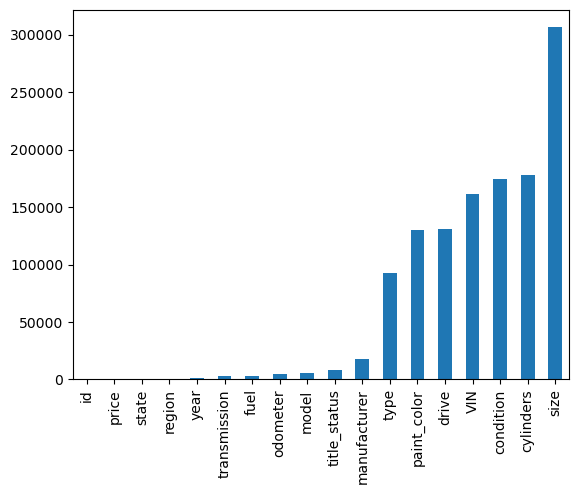

In [1189]:
#plot which category has the most NAN fields
auto.isnull().sum().sort_values().plot(kind = 'bar')
plt.show()
# This shows that 'size' has the most NAN fields.  considering to drop size because more that 75% of the data do not have the size feature
# However, size can be inferred by cylinder numbers, type of the car, and model.  Dropping this feature

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [1193]:
# doing dropna directly, may cut out more than 90% of the rows.  from 400K rows to 35K.  This may be too much
#dropping id, size, vin number only would preserve more data for analysis
auto = auto.drop({'id','size','VIN','region','state'}, axis=1)


In [1195]:
# drop any remaining rows would clean up the data and retain significant number of rows for analysis
auto = auto.dropna()

In [1197]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115988 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         115988 non-null  int64  
 1   year          115988 non-null  float64
 2   manufacturer  115988 non-null  object 
 3   model         115988 non-null  object 
 4   condition     115988 non-null  object 
 5   cylinders     115988 non-null  object 
 6   fuel          115988 non-null  object 
 7   odometer      115988 non-null  float64
 8   title_status  115988 non-null  object 
 9   transmission  115988 non-null  object 
 10  drive         115988 non-null  object 
 11  type          115988 non-null  object 
 12  paint_color   115988 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 12.4+ MB


In [1199]:
#Take a loot at the composition of the 'year' value counts.  We can see that the range of years are very wide.
auto['year'].value_counts().head(10)

year
2013.0    8393
2014.0    7752
2017.0    7459
2015.0    7382
2012.0    7360
2016.0    7348
2011.0    6705
2018.0    6065
2008.0    5868
2010.0    5374
Name: count, dtype: int64

After futher research of the used car market, the market is divided based on the age of the car.  It is definied below.
A car is considered classic, vintage, or antique based on its age:
Vintage Car: Manufactured between 1919 and 1930.
Antique Car: Manufactured 1975 or earlier (>45 years old).
Classic Car: Manufactured 2000 or earlier (>20 years old).

These vintage/antique/classic cars follow a different set of rules for used cars.  They are valued based on their sentimental value.  They are not main business of the used car dealership type of cars.  For this analysis, we will remove cars older than the year 2000.

In [1202]:
#drop cars that are too old that is before the year 2000.
auto = auto.drop(auto[auto['year'] < 2000].index)

In [1204]:
#normalize the data to the age of the car instead of the year of the car.  This would help in correlation between age of the car and price
auto['year'] = 2023-auto['year']

In [1207]:
#Take a loot at the composition of the 'price' value counts.
auto['price'].value_counts().head(15)

price
0        4233
6995     1020
6500     1013
4500     1011
7995      976
3500      947
5500      927
29990     927
7500      861
5995      860
1         815
9995      810
8995      791
8500      790
4995      754
Name: count, dtype: int64

There are car prices that are only 0 and 1 dolar.  These transactions are usually for cars that are transfering title between family and friends.  These types of transactions are outside of car dealership type of normal commercial transactions.  We will remove car prices of 0 and 1 dollar.

In [1210]:
# drop transactions that are less than 2 dollars.  These are not regular commercial transaction
auto = auto.drop(auto[auto['price'] < 2].index)

In [1212]:
auto['price'].value_counts().head(15)

price
6995     1020
6500     1013
4500     1011
7995      976
3500      947
5500      927
29990     927
7500      861
5995      860
9995      810
8995      791
8500      790
4995      754
10995     710
2500      680
Name: count, dtype: int64

In [1214]:
#take a look at the types of manufacturer.  There are a lot of different manufacturer
mf = auto['manufacturer'].value_counts()
mf

manufacturer
ford               17741
chevrolet          14758
toyota              8973
honda               6185
nissan              5817
jeep                4965
gmc                 4258
dodge               3703
ram                 3661
bmw                 2864
subaru              2599
hyundai             2505
mercedes-benz       2394
volkswagen          2081
lexus               2030
kia                 1914
chrysler            1836
cadillac            1409
infiniti            1390
buick               1320
audi                1212
mazda               1201
acura               1158
lincoln             1005
mitsubishi           782
volvo                749
pontiac              657
mini                 511
saturn               398
rover                374
mercury              340
jaguar               301
porsche              281
fiat                 153
tesla                 39
harley-davidson       31
alfa-romeo            25
ferrari               16
land rover             6
aston-martin

Text(0, 0.5, 'Count')

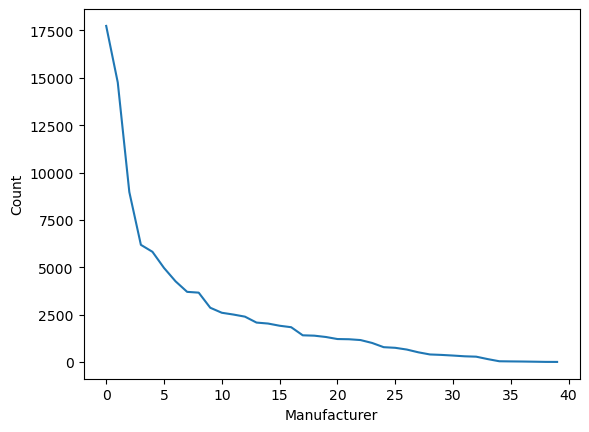

In [1216]:
# plot to see how the count is distributed against manufacturer
plt.plot(range(len(mf)), mf)
plt.xlabel('Manufacturer')
plt.ylabel('Count')

In [1218]:
#join smaller manufacturer into a others category.  This helps with seaborn plot later.
auto['manufacturer'] = auto['manufacturer'].apply(lambda s: s if str(s) in mf[:20] else 'others')
auto['manufacturer'].value_counts()

manufacturer
ford             17741
chevrolet        14758
others            9243
toyota            8973
honda             6185
nissan            5817
jeep              4965
gmc               4258
dodge             3703
ram               3661
bmw               2864
subaru            2599
hyundai           2505
mercedes-benz     2394
volkswagen        2081
lexus             2030
kia               1914
chrysler          1836
cadillac          1409
infiniti          1390
buick             1320
Name: count, dtype: int64

In [1219]:
# take a look at the number of different models.  THere are too many different models.
md = auto['model'].value_counts()
md

model
f-150                      1556
silverado 1500             1367
1500                        863
camry                       801
accord                      762
                           ... 
versa note s plus             1
silverado lt 2500             1
2500 st 4x4 quad cab          1
tt quattro roadster awd       1
cruze, 2lt                    1
Name: count, Length: 9606, dtype: int64

Text(0, 0.5, 'Count')

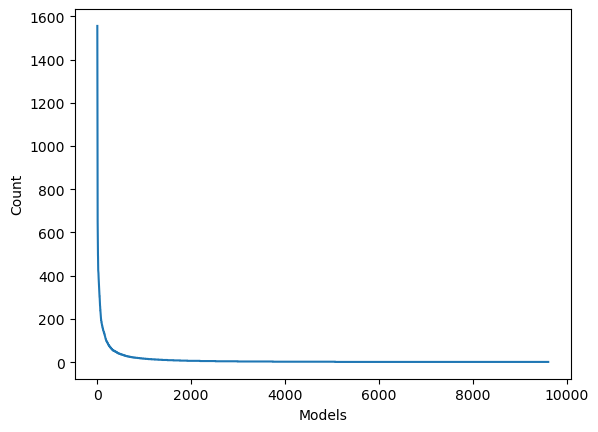

In [1220]:
#plot the distribution of models against count
plt.plot(range(len(md)), md)
plt.xlabel('Models')
plt.ylabel('Count')

In [1221]:
#There are too many models that would cause problems when we do encoding.  Need to group insignificant models into 'others'
auto['model'] = auto['model'].apply(lambda s: s if str(s) in md[:50] else 'others')
auto['model'].value_counts()

model
others                     77277
f-150                       1556
silverado 1500              1367
1500                         863
camry                        801
accord                       762
civic                        738
altima                       714
wrangler                     651
tacoma                       622
silverado                    619
escape                       612
corolla                      522
explorer                     505
2500                         505
impala                       494
focus                        489
grand cherokee               451
prius                        444
silverado 2500hd             437
grand caravan                425
camaro ss coupe 2d           423
equinox                      422
sonata                       420
mustang                      414
outback                      412
cr-v                         401
sierra 1500                  398
fusion                       395
malibu                       389
odys

In [1225]:
#take a look at the updated distribution of price
auto.describe()

,price,year,odometer
count,1.016460e+05,101646.000000,1.016460e+05
mean,5.489910e+04,11.481868,1.073542e+05
std,1.172885e+07,5.076732,1.080499e+05
min,3.000000e+00,1.000000,0.000000e+00
25%,6.500000e+03,7.000000,5.595700e+04
50%,1.200000e+04,11.000000,1.032905e+05
75%,2.464775e+04,15.000000,1.470000e+05
max,3.736929e+09,23.000000,9.999999e+06


In [1226]:
#remove the price outliers. set at 2 sigma level
p1 = auto['price'].quantile(0.975)
p2 = auto['price'].quantile(0.025)
auto = auto[(auto['price']<p1) & (auto['price']>p2)]
print(p1, p2)

46950.0 1800.0


In [1228]:
#remove the odometer outliers. set at 2 sigma level
o1 = auto['odometer'].quantile(0.975)
o2 = auto['odometer'].quantile(0.025)
auto = auto[(auto['odometer']<o1) & (auto['odometer']>o2)]
print(o1, o2)

237000.0 6933.0


We can see some interesting trend based on the data.  
1. Manufacturer who focust on Trucks and SUV tend to have a higher mean price.  Manufacturer who focuses on sedan tends to have a lower mean price.

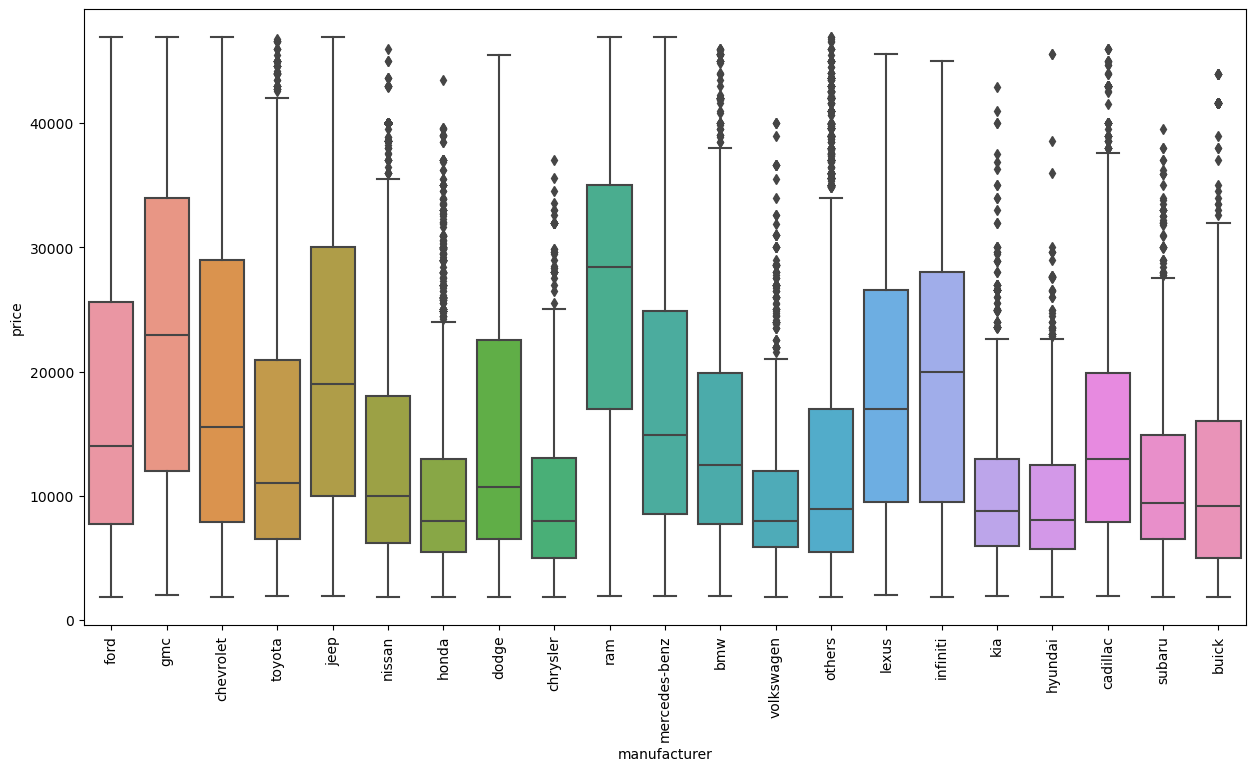

In [1234]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=auto, x='manufacturer', y='price')
plt.xticks(rotation=90)
plt.show()

2. We see the Toyota and Honda tends to have higher fleet age indicating that cars are more reliable to last longer.

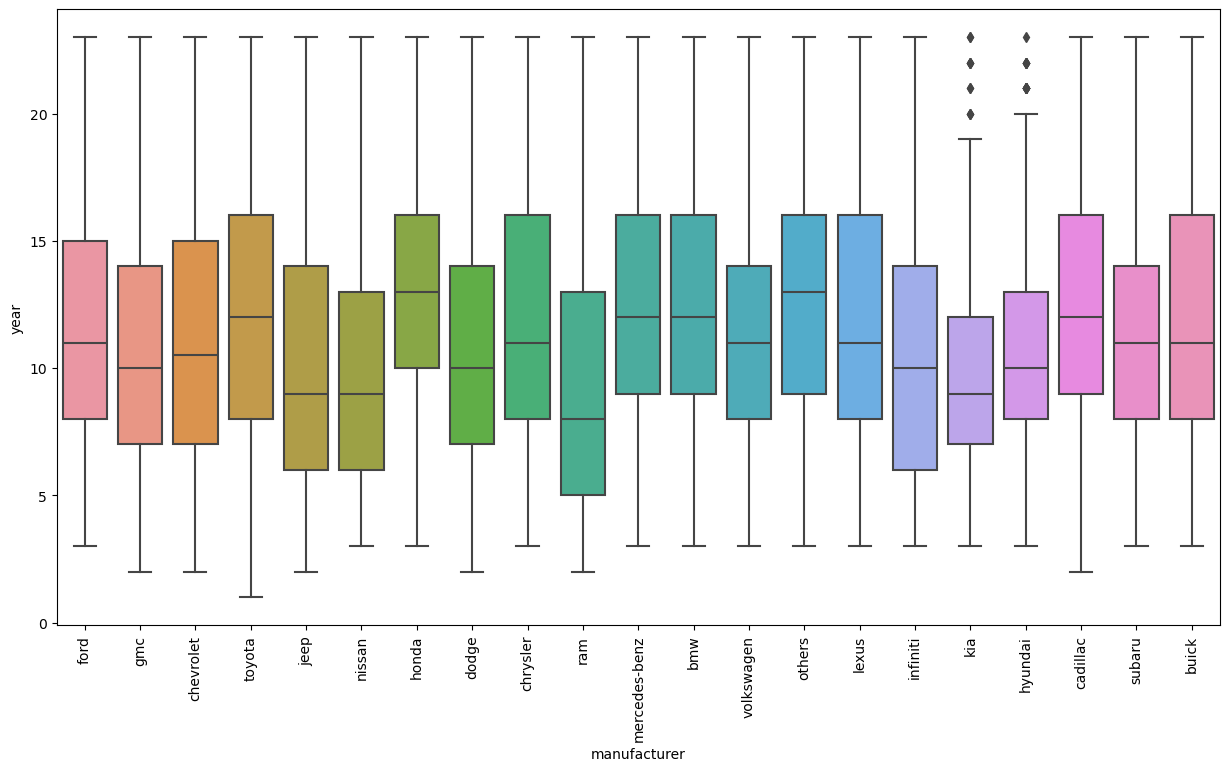

In [1238]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=auto, x='manufacturer', y='year')
plt.xticks(rotation=90)
plt.show()

Cars that are 3-5 years are the sweat spot of for used cars.  The value of the cars drop significantly beyond 6 years.

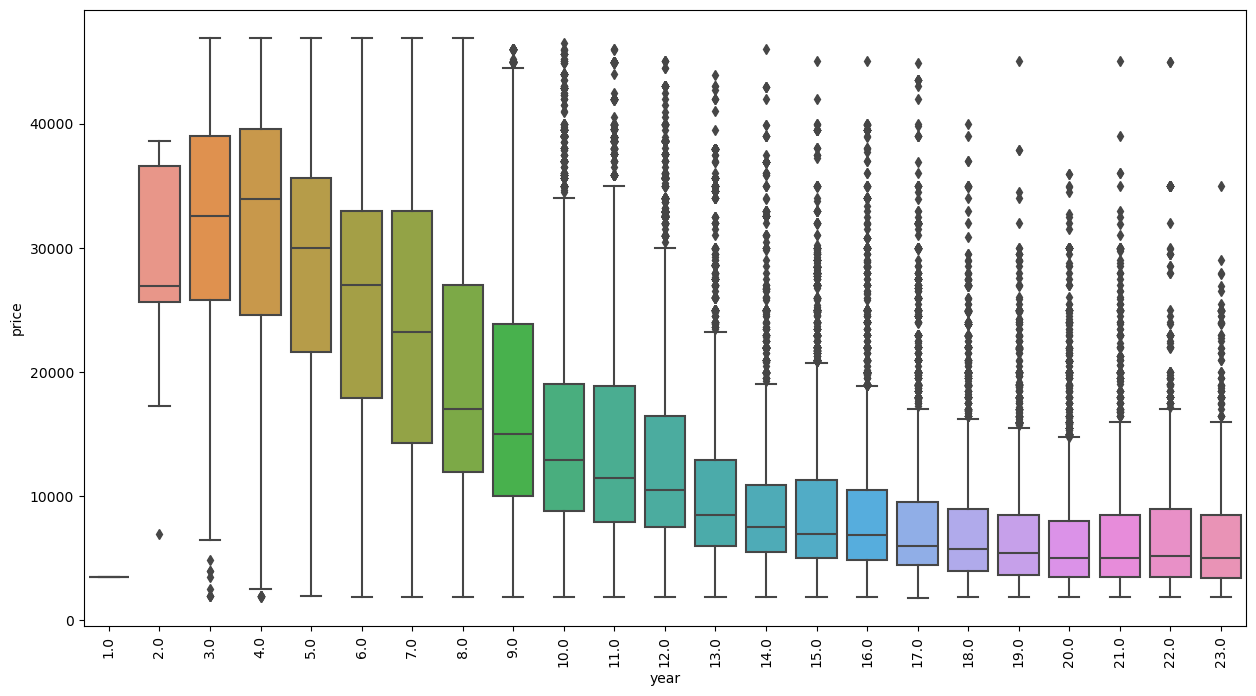

In [1295]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=auto, x='year', y='price')
plt.xticks(rotation=90)
plt.show()

There are incremental differences among "like new", "new", "good".  It is a factor, but pales in age (Year) of the car

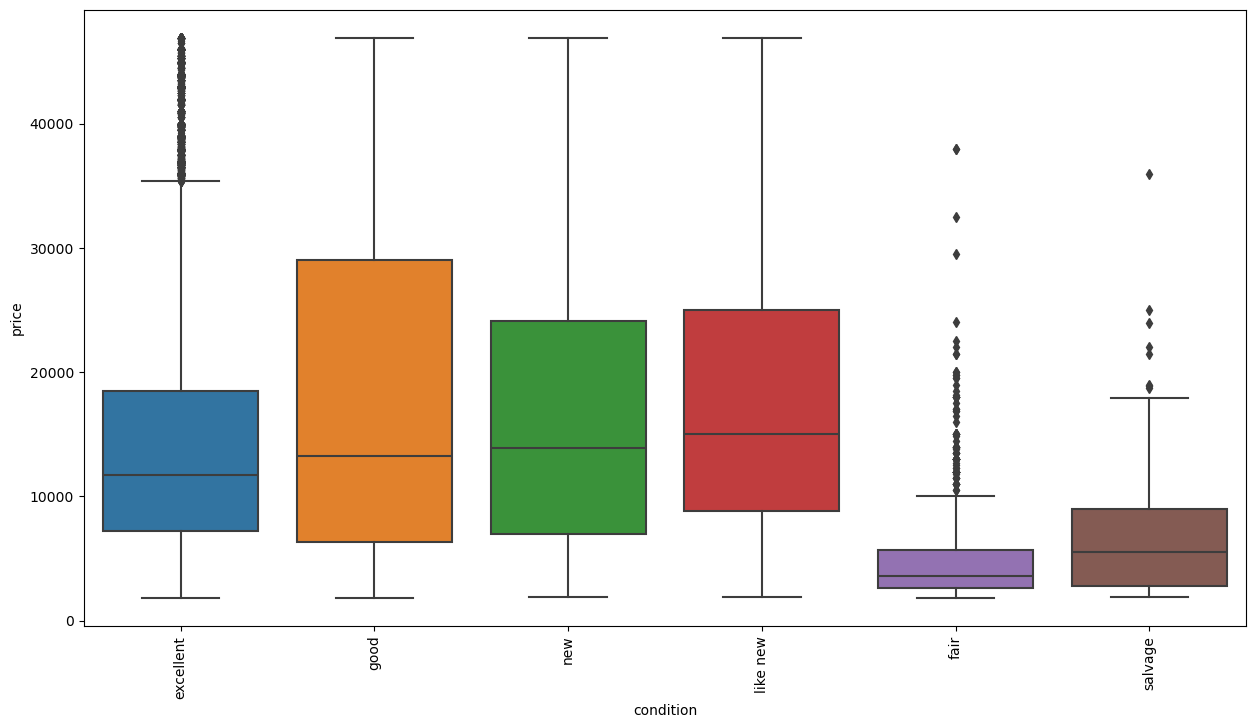

In [1299]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=auto, x='condition', y='price')
plt.xticks(rotation=90)
plt.show()

Looks like, Sports cars, truck, SUV, would have a higher price.  For example, the Camaro, Corvette, and 1500 Crew Ram Big Horn has a higher than average price.  Meaning these models has a higher value in the market place.

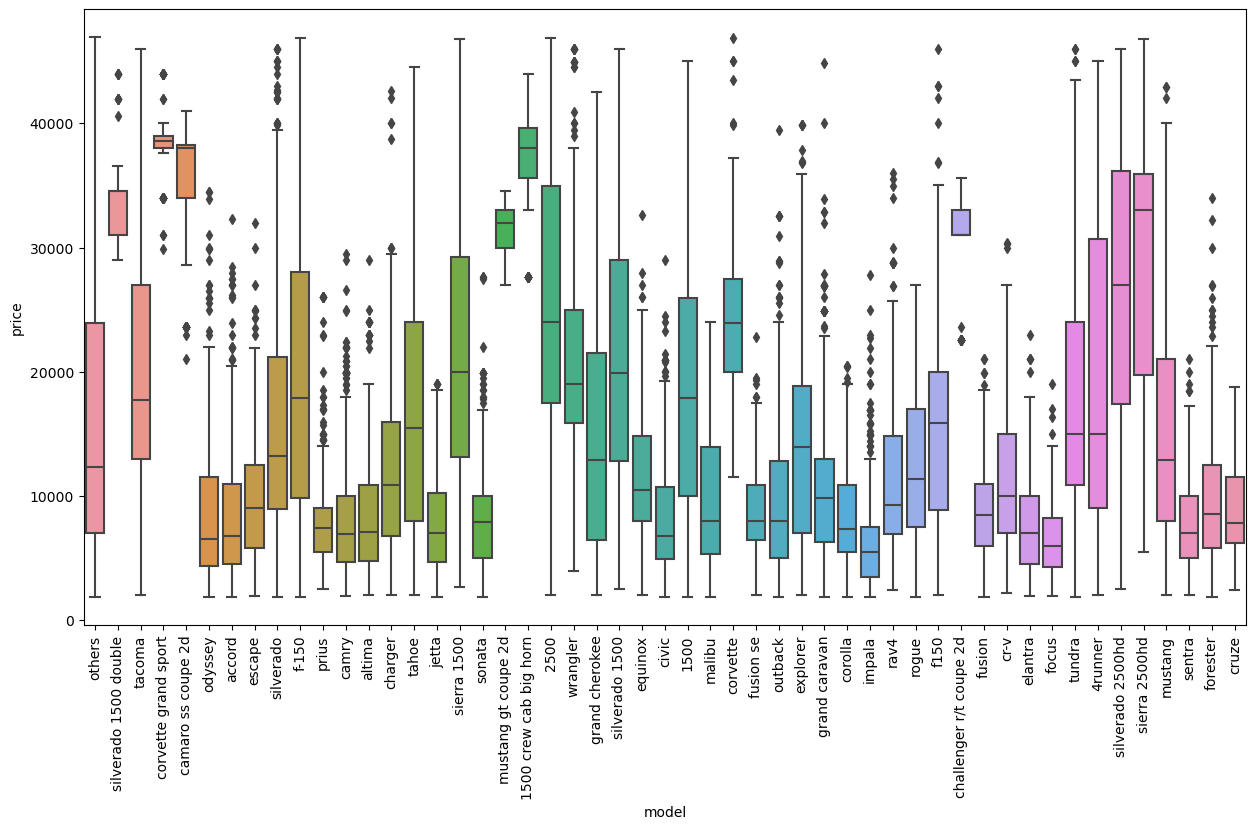

In [1241]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=auto, x='model', y='price')
plt.xticks(rotation=90)
plt.show()

Based on the title, we can see that lien and clean has the highest mean price, where as salvage, missing, and parts only all have lower mean price.  This makes sense since salvage means big accident and missing means could be stolen.  These factors would drive down the price as the buyers have to deal with uncertainty.

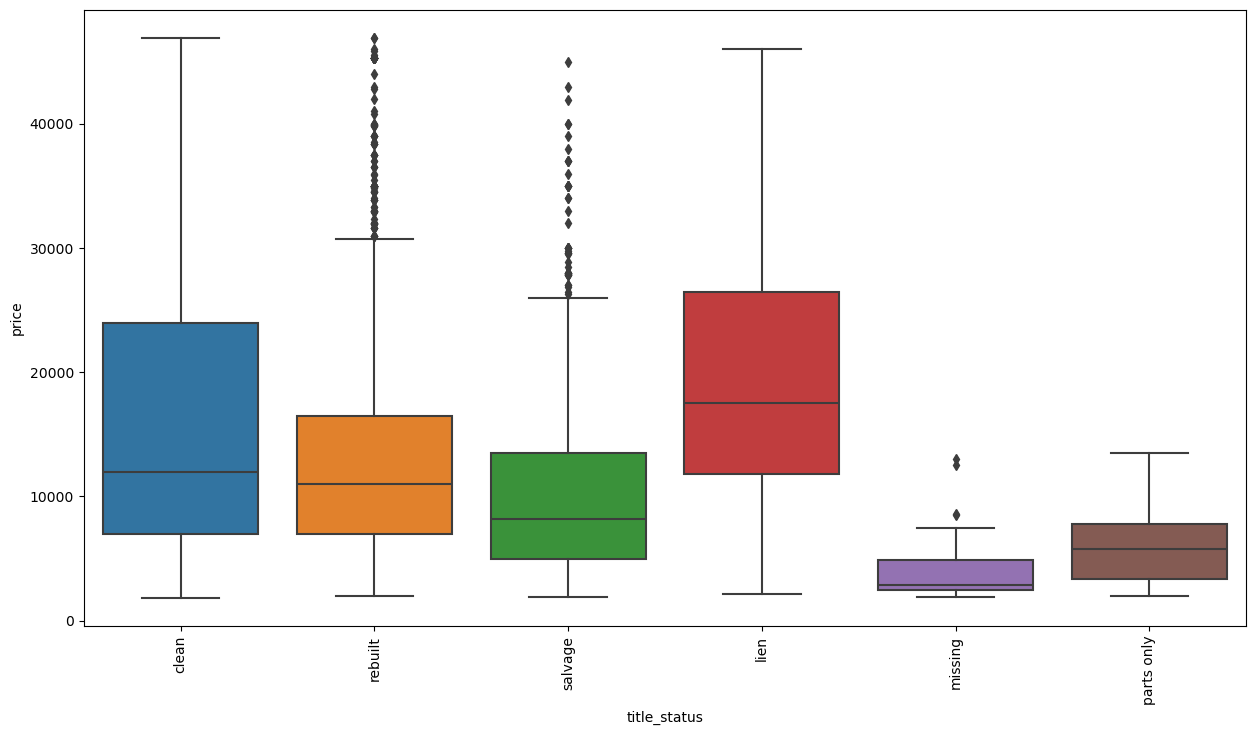

In [1244]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=auto, x='title_status', y='price')
plt.xticks(rotation=90)
plt.show()

Based on the boxplot, popular color like white gets the highest mean price in the used market place.


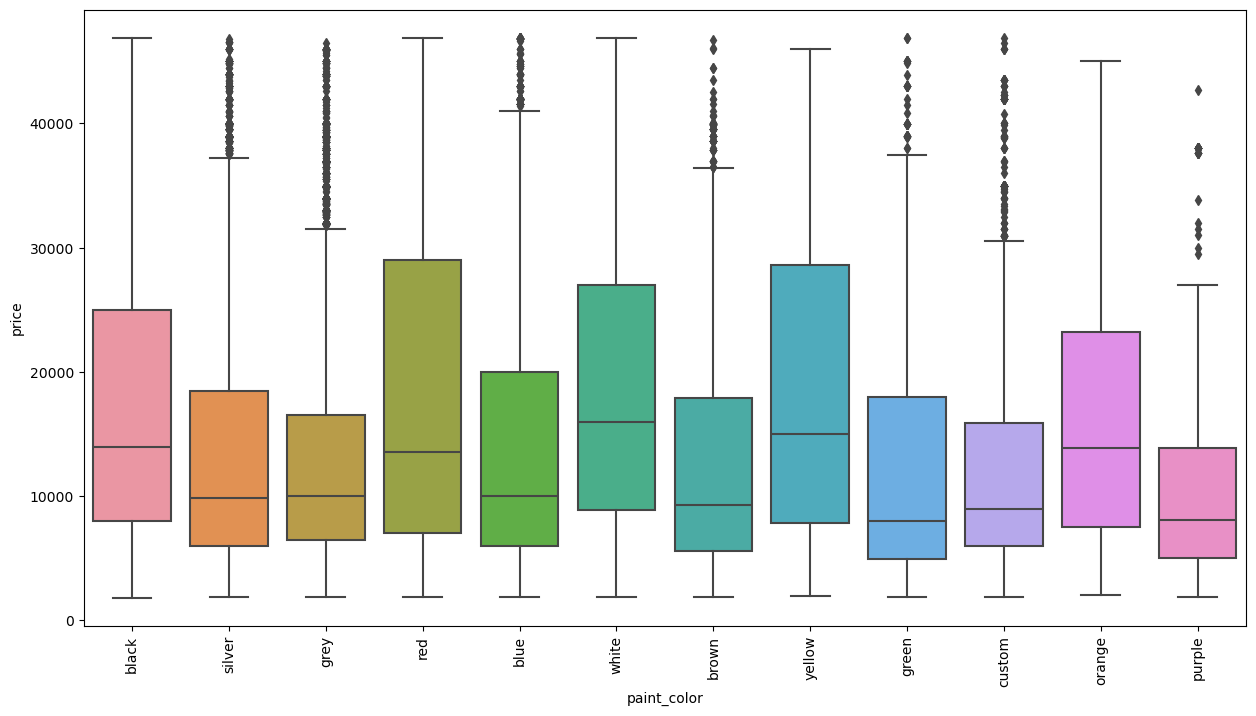

In [1247]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=auto, x='paint_color', y='price')
plt.xticks(rotation=90)
plt.show()

Taking a correlation on the numerical section of the date, we can see that price and odometer/year are negatively correlated.  This makes sense as the higher the odometer/year, then the lower price in the used car market.  Furthermore odometer and year are positively correlated.  This also makes sense as older the car, the odometer tend to be higher.

In [1250]:
X_num = auto[['price','odometer', 'year']]

In [1252]:
X_num.corr()

,price,odometer,year
price,1.000000,-0.613194,-0.622718
odometer,-0.613194,1.000000,0.612269
year,-0.622718,0.612269,1.000000


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Prep for Modeling

In [1259]:
#separate the numerical and categorical data and then encode the non numerical columns

X_num = auto[['odometer', 'year']]
X_cat = auto.drop(['odometer', 'year', 'price'], axis=1)

for i in X_cat.columns:
  le = LabelEncoder()
  X_cat[i] = le.fit_transform(X_cat[i])

X_cat.head()

,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color
31,6,34,0,5,2,0,0,2,10,0
32,7,34,2,6,2,0,2,0,8,0
33,3,44,2,5,2,0,2,0,8,9
34,19,47,0,5,2,0,0,0,10,5
35,3,34,2,5,2,0,2,0,8,8


In [1261]:
#fit and transform scaler with the numerical data. then concatenate numerical and categorical data back in the pd data frame.
#this concanated will be our X and price row will be our Y.
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y = auto['price']
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91692 entries, 31 to 426878
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   odometer      91692 non-null  float64
 1   year          91692 non-null  float64
 2   manufacturer  91692 non-null  int32  
 3   model         91692 non-null  int32  
 4   condition     91692 non-null  int32  
 5   cylinders     91692 non-null  int32  
 6   fuel          91692 non-null  int32  
 7   title_status  91692 non-null  int32  
 8   transmission  91692 non-null  int32  
 9   drive         91692 non-null  int32  
 10  type          91692 non-null  int32  
 11  paint_color   91692 non-null  int32  
dtypes: float64(2), int32(10)
memory usage: 5.6 MB


In [1263]:
y

31        15000
32        27990
33        34590
34        35000
35        29990
          ...  
426857    41990
426860    39990
426866    32990
426874    33590
426878    28990
Name: price, Length: 91692, dtype: int64

In [1281]:
#split into train and test data
#Auto_X_Train, Auto_X_Test, Auto_y_train, Auto_y_test = train_test_split(auto1, auto_target1, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1283]:
#this function is written to calculate the accuracy metric of the model.  It also plots out the model prediction and the test
def accuracy(model,train,test):

    global mae_train, mae_test, mse_train, mse_test
    
    train_preds = model.predict(train)  
    test_preds = model.predict(test)

    r2 = r2_score(y_test, test_preds)
    mae_train = mean_absolute_error(y_train, train_preds)
    mae_test = mean_absolute_error(y_test, test_preds)
    mse_train = sqrt(mean_squared_error(y_train, train_preds))
    mse_test = sqrt(mean_squared_error(y_test,test_preds))
    print(f"Test R²: {r2:.4f}")
    print(f'MAE Training data: {round(mae_train, 2)}')
    print(f'MAE Testing data: {round(mae_test, 2)}')
    print(f'MSE Training data: {round(mse_train, 2)}')
    print(f'MSE Testing data: {round(mse_test, 2)}')
    
    plt.scatter(x=y_test, y=test_preds, alpha=0.005)
    plt.plot([0, 60000], [0,60000], 'r-')



### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Test R²: 0.7032
MAE Training data: 4528.58
MAE Testing data: 4541.6
MSE Training data: 6051.51
MSE Testing data: 6048.45


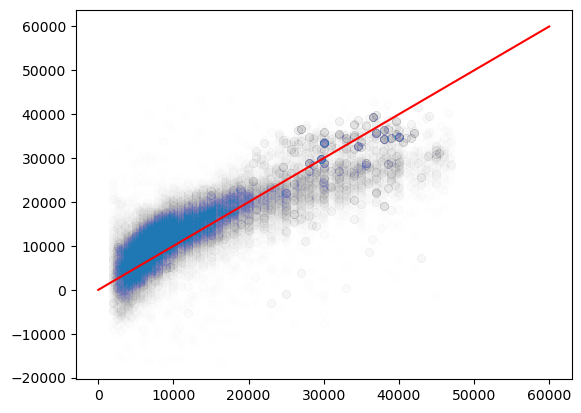

In [1287]:
#Try Linear Regression model on 
linreg = LinearRegression()
linreg.fit(X_train, y_train)
accuracy(linreg,X_train,X_test)

Test R²: 0.7032
MAE Training data: 4528.58
MAE Testing data: 4541.6
MSE Training data: 6051.51
MSE Testing data: 6048.45


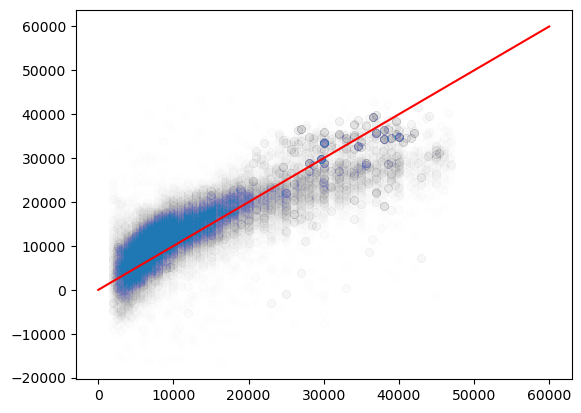

In [1289]:
# try ridge CV
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)
accuracy(ridge,X_train,X_test)

Test R²: 0.7032
MAE Training data: 4528.59
MAE Testing data: 4541.62
MSE Training data: 6051.51
MSE Testing data: 6048.46


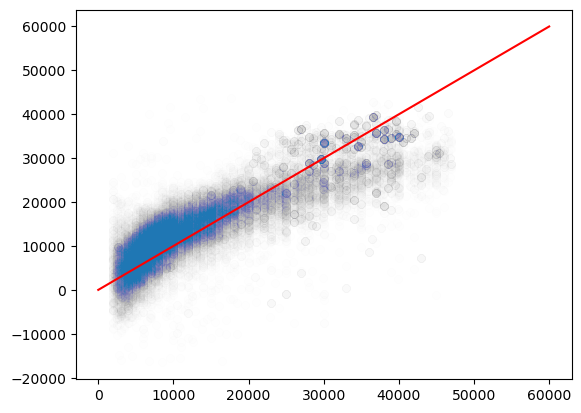

In [1291]:
#try ridge pipeline with GridSearchCV
ridge_scaler = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

#ridge_param_dict = {'ridge__alpha': np.logspace(-3, 3, 50)}
ridge_param_dict = {'ridge__alpha': [0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(ridge_scaler, param_grid = ridge_param_dict)
ridge_grid.fit(X_train, y_train)
accuracy(ridge_grid,X_train,X_test)


Test R²: 0.7032
MAE Training data: 4528.59
MAE Testing data: 4541.62
MSE Training data: 6051.51
MSE Testing data: 6048.46


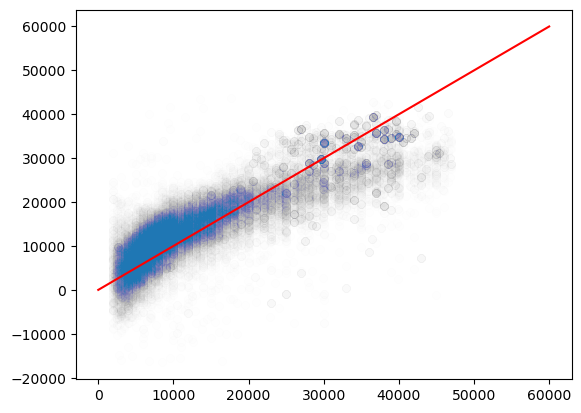

In [1293]:
#Try K-Fold method
kfold = KFold(n_splits =5, shuffle =True, random_state=42)
ridge_grid_kFold = GridSearchCV(ridge_scaler, param_grid = ridge_param_dict, scoring = "neg_mean_squared_error", cv = kfold)
ridge_grid_kFold.fit(X_train, y_train)
accuracy(ridge_grid_kFold,X_train,X_test)

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

The main factors influencing price are age, odometer, condition.  Secondary factors are manufacturer, model, and color.  Therefore, used car dealers should focus on the main factors when determining how to source the cars for the dealership.  Secondary factor should just be use if local market is more afluent neighborhood or a blue collar one.  Cars that are 3-5 years are the sweat spot of for used cars.  The value of the cars drop significantly beyond 6 years.